# Kinematics of Planetary Nebula (fitting Gaussians)

This is a demonstration notebook that sets out to show an example of a very practical application of Python model fitting to a real scintific problem.

When stars of a similar mass to our Sun move towards the end of their life, changes in element 'burning' within their core result in a dramatic expansion leading to the shedding of shells of gas into surrounding space. These shells of gas continue to expand, illuminated by the stellar remnant left behind. These Planetary nebulae (PN) can be quite complex, and rather beautiful (have a look for images of NGC6543, NGC6720, NGC6302, NGC7293, and a particular favourite of mine, Fleming 1).

The stellar illumination exites the gas in the nebula which then re-emits light at specific emission wavelegths. Spectroscopic analysis of this light from the nebula allows us to calculate the radial velocities of the gas using the Doppler effect - much like the red-shifted light from distant galaxies. This can tell us quite a bit about the kinematic structure of the PN. For example, a spectrum taken through the centre of an expanding shell would see a particular emission line split into 2 distinct 'peaks' - one from the bit of the shell advancing towards us and one moving away.

Here we'll look at just such a spectrum and try and deduce something about it's structure, then extract numerical data from it.

The data used here is a (slightly modified) example of a high dispersion spectrum taken through an OIII filter of the Planetary Nebula NGC2818. The OIII line occurs at 5007 Angstroms. It's contained in a file 'pn_shell.csv'


As usual, we'll set up imports, read in the data and have aquick look at it - noting key features and making a few estimated measurements.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

# These 2 lines just allow 'pretty' printing of pandas stuff - non-essential
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Set the size of subsequent plots
plt.rcParams['figure.figsize']=[10,6]

,wavelength,intensity
0,5006.400000,0.105874
1,5006.402109,0.118354
2,5006.404218,0.120077
3,5006.406327,0.109533
4,5006.408436,0.091054


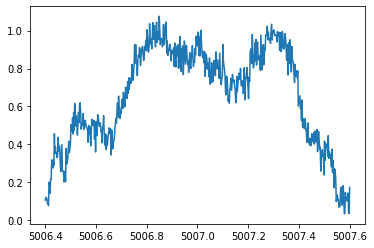

In [2]:
# Read in the data
df = pd.read_csv('pn_shell.csv')

# What does it look like? - just for info
df.head()

# Set up x and y - not strictly necessary, but convenient
x=df['wavelength']
y=df['intensity']

plt.plot(x,y)

As you can see it's all abit messy. However, we might expect to see some kind of evidence for shell expansion, and in fact there do seem to be 2 identifiable peaks at either side of the spectrum, straddling the 'rest frequency' of 5007 Angstroms (roughly at 5006.5 and 5007.3 Angstroms)

Let's see if we can  fit a 2 Gaussians to sub-sets of the data.

## 2 Separate Gaussians

fit parameters right hand 
***************************************************
a = 0.9573834621490945
x0 = 5007.2891603778135
sigma = 0.13947310062504076
***************************************************
fit parameters left hand
***************************************************
a = 0.5180046381004991
x0 = 5006.573879695943
sigma = 0.11765367959970478
***************************************************


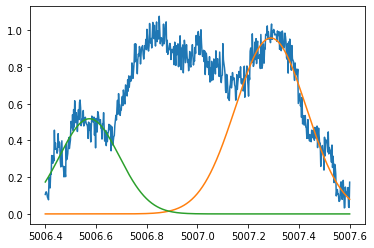

In [3]:
# define a Gaussian model
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Fit to a sub-set of data around the left hand peak
popt, pcov = curve_fit(gauss,x[375:],y[375:], p0=[0.9,5007.3,.1])

print('fit parameters right hand ')
print('***************************************************')
print ('a = ' + str(popt[0]))
print ('x0 = ' + str(popt[1]))
print ('sigma = ' + str(popt[2]))
print('***************************************************')

# Fit to a sub-set of data around the right hand peak
popt2, pcov = curve_fit(gauss,x[:125],y[:125], p0=[0.6,5006.5,.1])

print('fit parameters left hand')
print('***************************************************')
print ('a = ' + str(popt2[0]))
print ('x0 = ' + str(popt2[1]))
print ('sigma = ' + str(popt2[2]))
print('***************************************************')

# What does that look like
plt.plot(x,y)
plt.plot(x,gauss(x,popt[0],popt[1],popt[2]))
plt.plot(x,gauss(x,popt2[0],popt2[1],popt2[2]))


That's not bad and we could perhaps use the peak positions of 5006.6 and 5007.2. But what about that 'lump' in the middle. Surely that must be adding to the signal for the left and right peaks?

Let's try a multi-Gaussian fit - with 3 Gaussians


## 3 Gaussian model

In [4]:
# define a Gaussian model
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# define a 3 gaussian model
def gauss3(x, a1, x10, sigma1, a2, x20, sigma2, a3, x30, sigma3 ):
    return a1*np.exp(-(x-x10)**2/(2*sigma1**2)) +\
            a2*np.exp(-(x-x20)**2/(2*sigma2**2)) +\
            a3*np.exp(-(x-x30)**2/(2*sigma3**2))

output_notebook()

# Read in the data
df = pd.read_csv('pn_shell.csv')
# What does it look like? - just for info
df.head()

# Set up x and y - not strictly necessary, but convenient
x=df['wavelength']
y=df['intensity']

# We'll hard-code in the initial estimates - you would probably prompt the user for these
x10est = 5006.5
x20est = 5006.9
x30est = 5007.3
a1est = 0.5
a2est = 1.0
a3est = 1.0

# We won't be using FWHM here so we'll just use sigma estimates - once again for brevity
sigma1est = .1/2.35
sigma2est = .2/2.35
sigma3est = .1/2.35

# We'll stick these into a list for ease of handling
p0 = [a1est, x10est, sigma1est, a2est, x20est, sigma2est, a3est, x30est, sigma3est ]

# x and y are:
x = df['wavelength']
y = df['intensity']

# do the fit
popt, pcov = curve_fit(gauss3,x,y,p0)

# What are the optimised parameters?
print('fit parameters')
print('***************************************************')
print ('a1 = ' + str(popt[0]))
print ('x10 = ' + str(popt[1]))
print ('sigma1 = ' + str(popt[2]))
print ('a2 = ' + str(popt[3]))
print ('x20 = ' + str(popt[4]))
print ('sigma2 = ' + str(popt[5]))
print ('a3 = ' + str(popt[6]))
print ('x30 = ' + str(popt[7]))
print ('sigma3 = ' + str(popt[8]))
print('***************************************************')
print(f'Outer peaks are at wavelegths of {popt[1]:.1f} and {popt[7]:.1f} Angstroms')
print('***************************************************')

# Plot it (Matplotlib)
# plt.plot(df['wavelength'],df['intensity'], label='Data', color='lightgrey', linewidth=5)
# plt.plot(df['wavelength'],gauss2(df['wavelength'],popt[0],popt[1],popt[2],
#                                popt[3], popt[4], popt[5]), 'r--')

# Plot the data with the optimised curve (Bokeh):
p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
          x_axis_label='Wavelength (Angstroms)', 
          y_axis_label='Intensity')
p1.scatter(df['wavelength'],df['intensity'], legend='Data')
p1.line(df['wavelength'],gauss3(df['wavelength'],popt[0],popt[1],popt[2], \
                              popt[3], popt[4], popt[5], \
                               popt[6], popt[7], popt[8]),
                              
        color='red', 
        line_width=2, 
        legend='Optimised curve')
p1.line(df['wavelength'], gauss(df['wavelength'],popt[0],popt[1],popt[2]))
p1.line(df['wavelength'], gauss(df['wavelength'],popt[3],popt[4],popt[5]))
p1.line(df['wavelength'], gauss(df['wavelength'],popt[6],popt[7],popt[8]))
p1.legend.location = "top_left"
p1.legend.click_policy="hide"
show(p1)

Loading BokehJS ...

,wavelength,intensity
0,5006.400000,0.105874
1,5006.402109,0.118354
2,5006.404218,0.120077
3,5006.406327,0.109533
4,5006.408436,0.091054


fit parameters
***************************************************
a1 = 0.3223894665874774
x10 = 5006.510708764585
sigma1 = 0.06623535609466757
a2 = 0.9639416837961087
x20 = 5006.886268066835
sigma2 = 0.19688432716500795
a3 = 0.8361718059171789
x30 = 5007.3172621057665
sigma3 = 0.12692541106433483
***************************************************
Outer peaks are at wavelegths of 5006.5 and 5007.3 Angstroms
***************************************************


GlyphRenderer(id='1039', ...)

GlyphRenderer(id='1054', ...)

GlyphRenderer(id='1070', ...)

GlyphRenderer(id='1077', ...)

GlyphRenderer(id='1084', ...)


Once again, look OK. Interesting that the peaks of interest have now moved 'outwards' to 5006.5 and 5007.3 Angstroms.

Can we do 'better'? Well, the central Gaussian fitted to the 'hump' looks rather wider than the other 2 - wonder if it's actually composed of 2 lines itself?

Let's try it


# 4 gauss model

In [5]:
# define a Gaussian model
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# 4 Gauss model
def gauss4(x, a1, x10, sigma1, a2, x20, sigma2, a3, x30, sigma3, a4, x40, sigma4 ):
    return a1*np.exp(-(x-x10)**2/(2*sigma1**2)) +\
            a2*np.exp(-(x-x20)**2/(2*sigma2**2)) +\
            a3*np.exp(-(x-x30)**2/(2*sigma3**2)) +\
            a4*np.exp(-(x-x40)**2/(2*sigma4**2))

output_notebook()

# Read in the data
df = pd.read_csv('pn_shell.csv')
# What does it look like? - just for info
# df.head()

# Set up x and y - not strictly necessary, but convenient
x=df['wavelength']
y=df['intensity']
#plt.plot(x,y)

# Once again hard-code the initial guess - normal;ly these would be prompted for.
x10est = 5006.5
x20est = 5006.8
x30est = 5007.0
x40est = 5007.3

a1est = 0.5
a2est = 1.0
a3est = 1.0
a4est = 1.0

# We won't be using FWHM here so we'll just use sigma estimates - once again for brevity
sigma1est = .1/2.35
sigma2est = .1/2.35
sigma3est = .1/2.35
sigma4est = .1/2.35

# We'll stick these into a list for ease of handling
p0 = [a1est, x10est, sigma1est, 
      a2est, x20est, sigma2est, 
      a3est, x30est, sigma3est, 
      a4est, x40est, sigma4est ]

# x and y are:
x = df['wavelength']
y = df['intensity']

# do the fit
popt, pcov = curve_fit(gauss4,x,y,p0)

# What are the optimised parameters?
print('fit parameters')
print('***************************************************')
print ('a1 = ' + str(popt[0]))
print ('x10 = ' + str(popt[1]))
print ('sigma1 = ' + str(popt[2]))
print ('a2 = ' + str(popt[3]))
print ('x20 = ' + str(popt[4]))
print ('sigma2 = ' + str(popt[5]))
print ('a3 = ' + str(popt[6]))
print ('x30 = ' + str(popt[7]))
print ('sigma3 = ' + str(popt[8]))
print ('a4 = ' + str(popt[9]))
print ('x40 = ' + str(popt[10]))
print ('sigma4 = ' + str(popt[11]))
print('***************************************************')
print(f'Outer peaks are at wavelegths of {popt[1]:.1f}, \
 and {popt[10]:.1f} Angstroms')
print('***************************************************')

Loading BokehJS ...

fit parameters
***************************************************
a1 = 0.4701610915631673
x10 = 5006.533113419058
sigma1 = 0.08542157357273966
a2 = 0.9546828351705225
x20 = 5006.821818275181
sigma2 = 0.11000366649138658
a3 = 0.5636190455960668
x30 = 5007.026626584352
sigma3 = 0.0757378603346662
a4 = 0.950393410853384
x40 = 5007.293656817523
sigma4 = 0.13657504237607163
***************************************************
Outer peaks are at wavelegths of 5006.5,  and 5007.3 Angstroms
***************************************************



We'll, our estimates for the outer peak positions haven't changed much, but we do have an interesting hint at an inner shell. Let's plot it out.

We've use some more Bokeh features here - just to show what can be done - obviously not neccessary.

In [6]:
# Plot it (Matplotlib)
# plt.plot(df['wavelength'],df['intensity'], label='Data', color='lightgrey', linewidth=5)
# plt.plot(df['wavelength'],gauss2(df['wavelength'],popt[0],popt[1],popt[2],
#                                popt[3], popt[4], popt[5]), 'r--')

# Plot the data with the optimised curve (Bokeh):

# Set up some 'y' values for coloured patches
g1 = gauss(df['wavelength'],popt[0],popt[1],popt[2])
g1[0] = 0 # needed to make patch extend to x axis
g2 = gauss(df['wavelength'],popt[3],popt[4],popt[5])
g3 = gauss(df['wavelength'],popt[6],popt[7],popt[8])
g4 = gauss(df['wavelength'],popt[9],popt[10],popt[11])
g4[g4.size-1] = 0 # needed to make patch extend to x axis

p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
          x_axis_label='Wavelength (Angstroms)', 
          y_axis_label='Intensity')
p1.scatter(df['wavelength'],df['intensity'], legend='Data', size=2, color ='black')
p1.line(df['wavelength'],gauss4(df['wavelength'],popt[0],popt[1],popt[2], \
                              popt[3], popt[4], popt[5], \
                              popt[6], popt[7], popt[8], \
                              popt[9], popt[10], popt[11]),
                              
        color='red', 
#         line_dash="dashed", 
        line_width=2,
        legend='Optimised curve')
p1.line(df['wavelength'], gauss(df['wavelength'],popt[0],popt[1],popt[2]), 
        line_color='blue', legend = 'First Gaussian')
p1.patch(df['wavelength'], g1, 
         fill_color='blue', fill_alpha=0.25)
p1.line(df['wavelength'], gauss(df['wavelength'],popt[3],popt[4],popt[5]), 
        line_color='green', legend = 'Second Gaussian')
p1.patch(df['wavelength'], g2, 
         fill_color='green', fill_alpha=0.25)
p1.line(df['wavelength'], gauss(df['wavelength'],popt[6],popt[7],popt[8]), 
        line_color='yellow', legend = 'Third Gaussian')
p1.patch(df['wavelength'], g3, 
         fill_color='yellow', fill_alpha=0.25)
p1.line(df['wavelength'], gauss(df['wavelength'],popt[9],popt[10],popt[11]), 
        line_color='red', legend = 'Fourth Gaussian')
p1.patch(df['wavelength'], g4, 
         fill_color='red', fill_alpha=0.25)       
p1.legend.location = "top_left"
p1.legend.click_policy="hide"
show(p1)

GlyphRenderer(id='1238', ...)

GlyphRenderer(id='1253', ...)

GlyphRenderer(id='1269', ...)

GlyphRenderer(id='1287', ...)

GlyphRenderer(id='1294', ...)

GlyphRenderer(id='1316', ...)

GlyphRenderer(id='1323', ...)

GlyphRenderer(id='1349', ...)

GlyphRenderer(id='1356', ...)

GlyphRenderer(id='1386', ...)

Certainly 'by eye' the red 'optimised' curve does seem to fit the data points pretty well - but do see the discussion below.

Finally, let's work out what the expansion velocity of the shell that might be indicated by the 2 outer peaks actually is.


In [7]:
# Expansion velocity
radial_v1 = (5007 - popt[1])*3e5/5007
print(radial_v1)
radial_v4 = (5007 - popt[10])*3e5/5007
print(radial_v4)
expansion_v = (radial_v1-radial_v4)/2
print(f'Shell is expanding at {expansion_v:.1f} km/s from its centre')

27.974031212805176
-17.594776364457015
Shell is expanding at 22.8 km/s from its centre


# Discussion

We've seen that we can produce a nice model fit to the data and extract some real quantatative information from waht was, a pretty messy data set.

BUT, is it reasonable? It really is very important to not get caught up in the capabilities of the software. Remember that you can make a 3rd order polynomilal curve fit 4 data points perfectly - but that would really gives you no hard information - certainly not enough to extrapolate results from that fitted model.

In this case we have sensible Physics based reasons to expect to see an expanding shell of gas, and perhaps the fitting of the outer 2 peaks is justified. But what about the inner 2 peaks? This might indicate a second shell - or we might just be over-interpreting the data.

I guess, we just might have seen a tantalising possibility of a more complex PN structure here - anyone fancy writing a funding proposal?